In [194]:
#Importing all the required libraries|
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from gym import spaces
from google.colab import widgets
import time
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### **Part 1 - Deterministic Environment**

A deterministic environment is where the environment follows a static policy and the next state of the environment can be determined by the agents action and the currebt state of the environment

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
class Deterministic_GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    #Initializng the class with the action, states and the maximum timesteps that an agent can take
    def __init__(self):

        self.environment_width = 4
        self.environment_height = 4

        self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 25
    
    #Reset function is used to reset the environments and agents parameters for every episode during the training process
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        agent_state_number= self.agent_pos[0]*4+self.agent_pos[1]
        self.reward_silver = [0,1]
        self.reward_gold = [1,3]
        self.reward_diamond = [3,2]
        self.trap = [2,2]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4,4))
        #self.state[tuple(self.agent_pos)] = 1
        #self.state[tuple(self.goal_pos)] = 4
        #self.state[tuple(self.trap)] = 3
        #self.state[tuple(self.reward_silver)] = 2
        #self.state[tuple(self.reward_gold)] = 2
        #self.state[tuple(self.reward_diamond)] = 2
        observation = self.state.flatten()
        return agent_state_number
    
    #Step function executes the action that is selected by the agent in the environment
    def step(self, action):
        reward = 0

        if action == 0:             #Move Down
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1 
            reward -= 1

        if action == 1:
          self.agent_pos[0] -= 1    #Move Up
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1
            reward -= 1

        if action == 2:
          self.agent_pos[1] += 1    #Move Right 
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1
            reward -= 1

        if action == 3:
          self.agent_pos[1] -= 1    #Move Left
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1
            reward -= 1
          
        #To avoid the agent from moving outside the environment
        self.agent_pos = np.clip(self.agent_pos, 0, 3) 

        self.state = np.zeros((4,4))
        #self.state[tuple(self.agent_pos)] = 1
        #self.state[tuple(self.goal_pos)] = 4
        #self.state[tuple(self.trap)] = 3
        #self.state[tuple(self.reward_silver)] = 2
        #self.state[tuple(self.reward_gold)] = 2
        #self.state[tuple(self.reward_diamond)] = 2
        agent_state_number= self.agent_pos[0]*4+self.agent_pos[1]

        observation = self.state.flatten()

        #Rewarding Process
        if (self.agent_pos == self.trap).all():
          reward -= 20
        if (self.agent_pos == self.reward_silver).all():
          reward += 5
        if (self.agent_pos == self.reward_gold).all():
          reward += 10
        if (self.agent_pos == self.reward_diamond).all():
          reward += 30     
        if (self.agent_pos == self.goal_pos).all():
          reward += 100
    
        self.timestep += 1
        #done = True if (self.timestep >= self.max_timesteps) or (self.agent_pos == self.goal_pos).all() else False
        done = True if (self.agent_pos == self.goal_pos).all() else False

        info = {}
        
        return observation,agent_state_number, reward, done, info, self.timestep, self.agent_pos, action

    def render(self,mode='human'):

      fig, ax = plt.subplots(figsize=(8.5, 8.5))
      ax.set_xlim(0, 4)
      ax.set_ylim(0, 4)

      def plot_image(plot_pos):
        
        """This is a helper function to render the environment. It checks which objects are in a particular
        position on the grid and renders the appropriate image.

        :param arr plot_pos: Co-ordinates of the grid position which needs to be rendered."""

        # Initially setting every object to not be plotted.
        plot_agent, plot_silver, plot_gold, plot_diamond, plot_trap, plot_goal = \
            False, False, False, False, False, False

        # Checking which objects need to be plotted by comparing their positions.
        if np.array_equal(self.agent_pos, plot_pos):
            plot_agent = True
        if np.array_equal(self.reward_silver, plot_pos):
            plot_silver = True  
        if np.array_equal(self.reward_gold, plot_pos):
            plot_gold = True 
        if np.array_equal(self.reward_diamond, plot_pos):
            plot_diamond = True 
        if np.array_equal(self.trap, plot_pos):
            plot_trap = True 
        if np.array_equal(self.goal_pos, plot_pos):
            plot_goal = True

        #Plotting individual entities
        # Plot for Agent.
        if plot_agent and \
                all(not item for item in
                    [plot_silver, plot_gold, plot_diamond, plot_trap, plot_goal]):
            agent = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/agent.jpg'), zoom=0.15),
                                    np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(agent)

        # Plot for Silver.
        elif plot_silver and \
                all(not item for item in
                    [plot_agent, plot_gold, plot_diamond, plot_trap, plot_goal]):
            silver = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/silver.jpg'), zoom=0.15),
                                    np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(silver)

        # Plot for Gold.
        elif plot_gold and \
                all(not item for item in
                    [plot_agent, plot_silver, plot_diamond, plot_trap, plot_goal]):
            gold = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/gold.jpg'), zoom=0.15),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(gold)

        # Plot for Diamond.
        elif plot_diamond and \
                all(not item for item in
                    [plot_agent, plot_silver, plot_gold, plot_trap, plot_goal]):
            diamond = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/diamond.jpg'), zoom=0.15),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(diamond)

        # Plot for Trap.
        elif plot_trap and \
                all(not item for item in
                    [plot_agent, plot_silver, plot_gold, plot_diamond, plot_goal]):
            trap = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/trap.jpg'), zoom=0.15),
                                    np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(trap)

        # Plot for Goal.
        elif plot_goal and \
                all(not item for item in
                    [plot_agent, plot_silver, plot_gold, plot_diamond, plot_trap]):
            goal = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/goal.jpg'), zoom=0.15),
                                    np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(goal)

        # Plot for Agent and Silver.
        elif all(item for item in [plot_agent, plot_silver]) and \
                all(not item for item in
                    [plot_gold, plot_diamond, plot_trap, plot_goal]):
            agent_silver = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/agent_silver.jpg'), zoom=0.12),
                                          np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(agent_silver)

        # Plot for Agent and Gold.
        elif all(item for item in [plot_agent, plot_gold]) and \
                all(not item for item in
                    [plot_silver, plot_diamond, plot_trap, plot_goal]):
            agent_gold = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/agent_gold.jpg'), zoom=0.12),
                                          np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(agent_gold)

        # Plot for Agent and Diamond.
        elif all(item for item in [plot_agent, plot_diamond]) and \
                all(not item for item in
                    [plot_silver,plot_gold, plot_trap, plot_goal]):
            agent_diamond = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/agent_diamond.jpg'), zoom=0.12),
                                          np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(agent_diamond)

        # Plot for Agent and Goal.
        elif all(item for item in [plot_agent, plot_goal]) and all(not item for item in [plot_silver,plot_gold,plot_diamond, plot_trap]):
            agent_goal = AnnotationBbox(OffsetImage(plt.imread('drive/MyDrive/images/agent_goal.jpg'), zoom=0.12),
                                          np.add(plot_pos, [0.5, 0.5]), frameon=False)
            ax.add_artist(agent_goal)

      coordinates_state_mapping_2 = {}
      for j in range(self.environment_height * self.environment_width):
          coordinates_state_mapping_2[j] = np.asarray(
              [j % self.environment_width, int(np.floor(j / self.environment_width))])

      # Rendering the images for all states.
      for position in coordinates_state_mapping_2:
          plot_image(coordinates_state_mapping_2[position])

      plt.xticks([0, 1, 2, 3])
      plt.yticks([0, 1, 2, 3])
      plt.grid()  # Setting the plot to be of the type 'grid'.

      plt.show()

### **Part 2 - Q_Learning Algorithm**


Episode Number :  999
Timestep :  1
Agent Position : [0 1]
Action : 2
Reward : 5


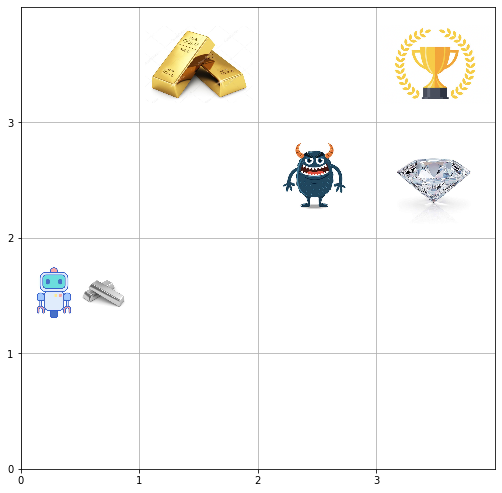

Episode Number :  999
Timestep :  2
Agent Position : [1 1]
Action : 0
Reward : 0


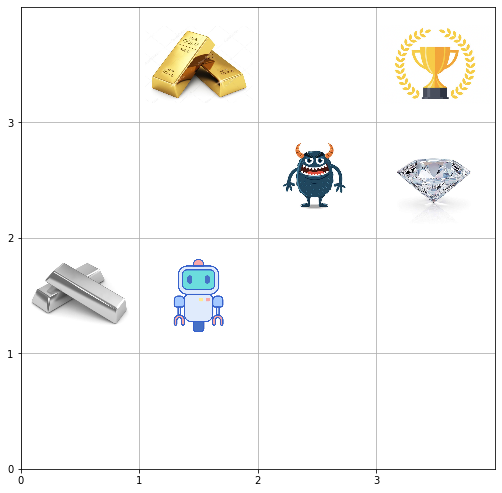

Episode Number :  999
Timestep :  3
Agent Position : [2 1]
Action : 0
Reward : 0


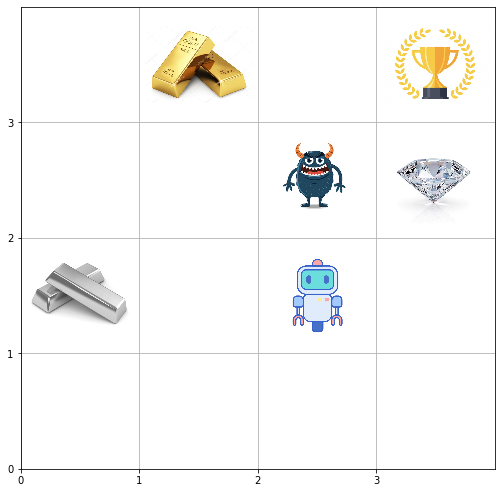

Episode Number :  999
Timestep :  4
Agent Position : [3 1]
Action : 0
Reward : 0


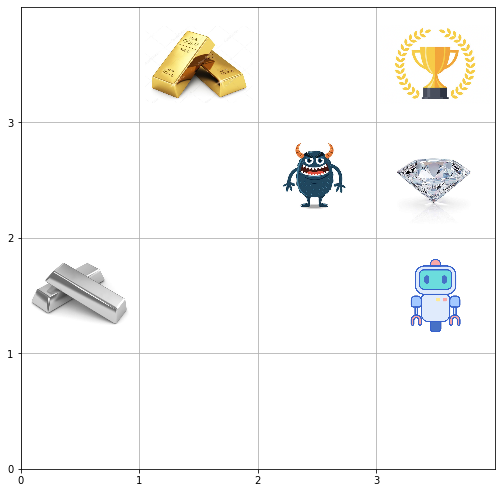

Episode Number :  999
Timestep :  5
Agent Position : [3 2]
Action : 2
Reward : 30


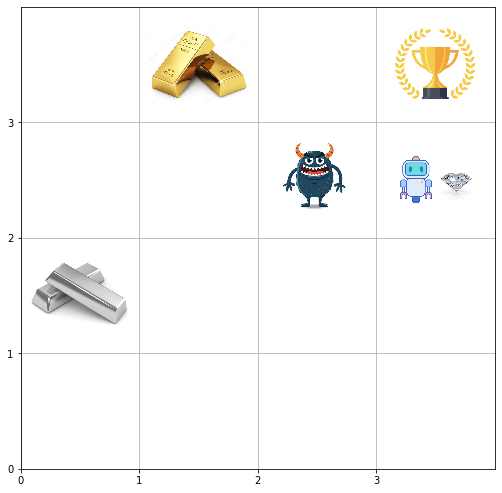

Episode Number :  999
Timestep :  6
Agent Position : [3 3]
Action : 2
Reward : 100


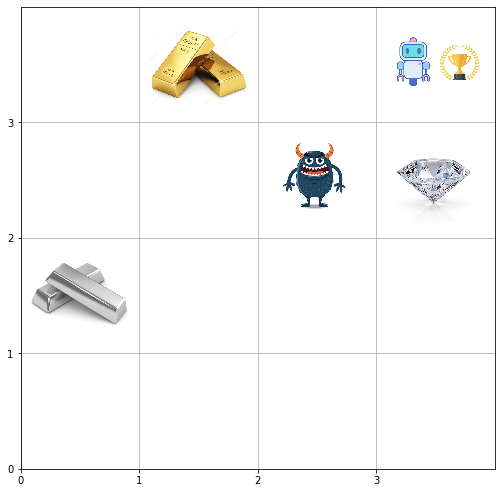

Text(0, 0.5, 'Epsilon')

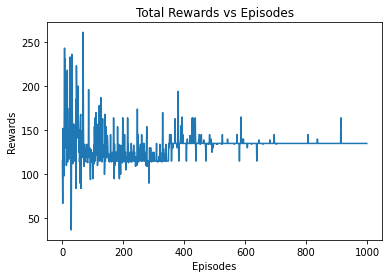

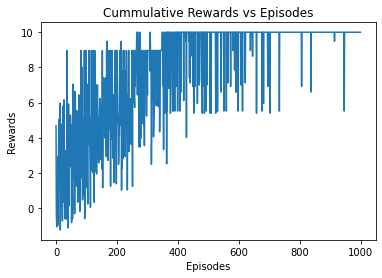

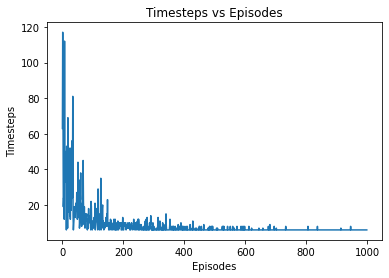

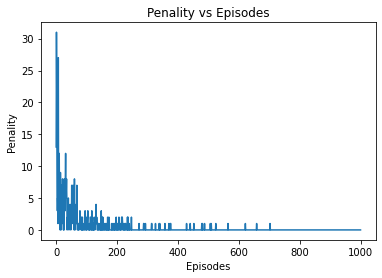

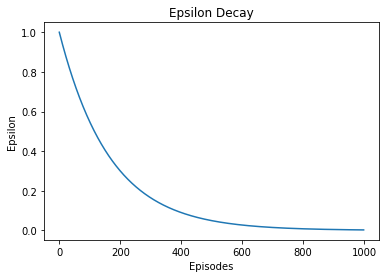

In [197]:
                                            ##### TRAINING  #####

env = Deterministic_GridEnvironment()

#Initializing a Q learning table with a dimension of observation space and action space 
qlearning_table_ql= np.zeros([env.observation_space.n, env.action_space.n])

#Inilializing all the hyper parameters required for the model
total_episode = 1000
alpha = 0.1
gamma = 0.6

#Initialize epsilon(for implementing greedy algorithm)
epsilon = 1

cummulative_reward_history_ql = []
total_reward_history_ql = []
total_timestep_history_ql = []
total_penality_history_ql = []
total_epsilon_decay_ql = []


#Action function to choose action for every step in an episode
def choose_action(state):
  action = 0
  if np.random.uniform(0,1) < epsilon:
    action = np.random.choice(env.action_space.n)
  else:
    action = np.argmax(qlearning_table_ql[state, :])
  return action


for i in range(total_episode):
  time_step_per_episode_ql = 0
  cummulative_rewards_per_episode_ql = 0
  total_rewards_per_episode_ql = 0
  total_penality_per_episode_ql = 0

  state_1 = env.reset()
  action_1 = choose_action(state_1)
  done = False
  #Looping through each step an agent takes in an environment until it reaches a terminal state
  while not done:
      observation, state_2, reward, done, info, timestep, agent_pos, action = env.step(action_1)
      action_2 = choose_action(state_2)
      qlearning_table_ql[state_1,action_1] = qlearning_table_ql[state_1,action_1] + alpha * (reward + gamma * (max(qlearning_table_ql[state_2,:])) - qlearning_table_ql[state_1,action_1])
      state_1 = state_2
      action_1 = action_2
      time_step_per_episode_ql+=1
      cummulative_rewards_per_episode_ql+=reward * (gamma ** time_step_per_episode_ql)
      total_rewards_per_episode_ql+=reward
      if reward == -1:
        total_penality_per_episode_ql+=1
      if(i>total_episode-2):
        print('Episode Number : ',i)
        print('Timestep : ',timestep)
        print('Agent Position :',agent_pos)
        print('Action :',action)
        print('Reward :',reward)      
        env.render()
        plt.show()
        time.sleep(1)
  cummulative_reward_history_ql.append(cummulative_rewards_per_episode_ql)
  total_reward_history_ql.append(total_rewards_per_episode_ql)
  total_timestep_history_ql.append(time_step_per_episode_ql)
  total_penality_history_ql.append(total_penality_per_episode_ql)

  epsilon= 1*(1-0.006) ** i
  total_epsilon_decay_ql.append(epsilon)

plt.plot(total_reward_history_ql)
plt.title('Total Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(cummulative_reward_history_ql)
plt.title('Cummulative Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.figure()
plt.plot(total_timestep_history_ql)  
plt.title('Timesteps vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Timesteps') 
plt.figure()
plt.plot(total_penality_history_ql)  
plt.title('Penality vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Penality') 
plt.figure()
plt.plot(total_epsilon_decay_ql)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')



In [198]:
qlearning_table_df_ql = pd.DataFrame(qlearning_table_ql,columns=['Right','Left','Up','Down'])
qlearning_table_df_ql

,Right,Left,Up,Down
0,9.357933,8.117898,16.664000,8.232275
1,19.440000,14.386066,15.075963,9.065720
2,27.467189,9.480671,19.129103,11.227661
3,45.824045,17.464094,17.876517,10.388680
4,6.621994,7.519398,17.990391,4.976241
5,32.400000,15.531948,27.600000,9.059539
6,32.424186,15.268564,46.000000,15.818191
7,60.000000,26.974487,44.669337,27.011691
8,3.376404,3.521448,24.422311,2.552647
9,54.000000,15.669393,22.986902,7.567832


Episode Number :  9
Timestep :  1
Agent Position : [0 1]
Action : 2
Reward : 5


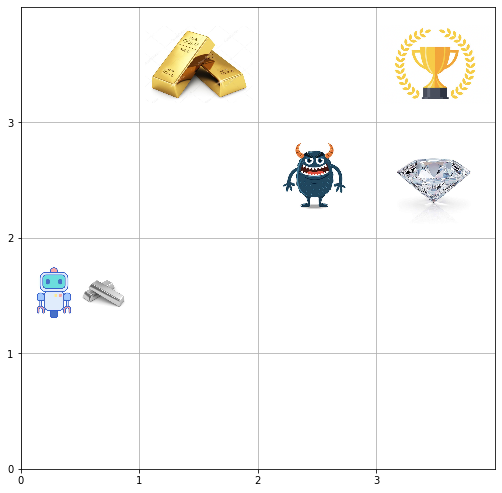

Episode Number :  9
Timestep :  2
Agent Position : [1 1]
Action : 0
Reward : 0


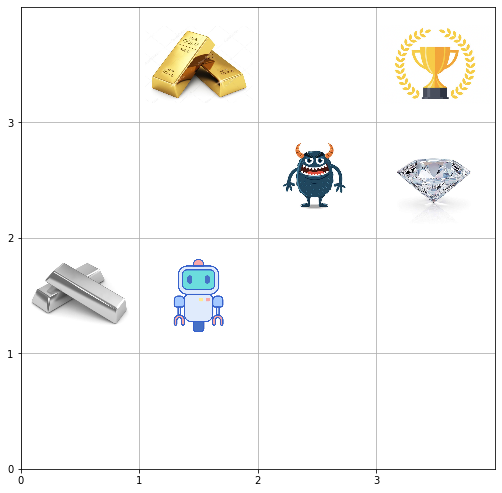

Episode Number :  9
Timestep :  3
Agent Position : [2 1]
Action : 0
Reward : 0


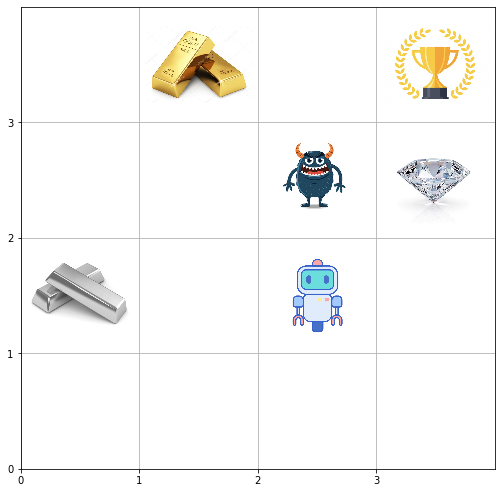

Episode Number :  9
Timestep :  4
Agent Position : [3 1]
Action : 0
Reward : 0


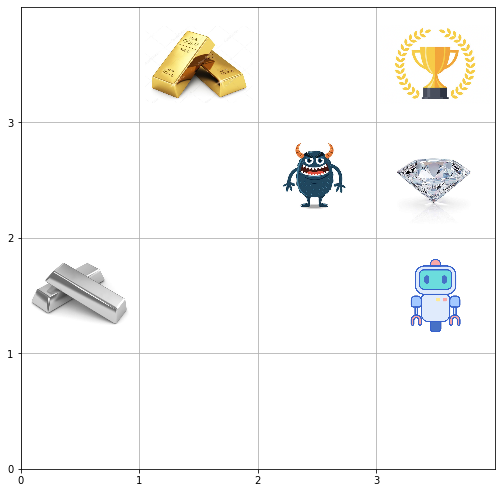

Episode Number :  9
Timestep :  5
Agent Position : [3 2]
Action : 2
Reward : 30


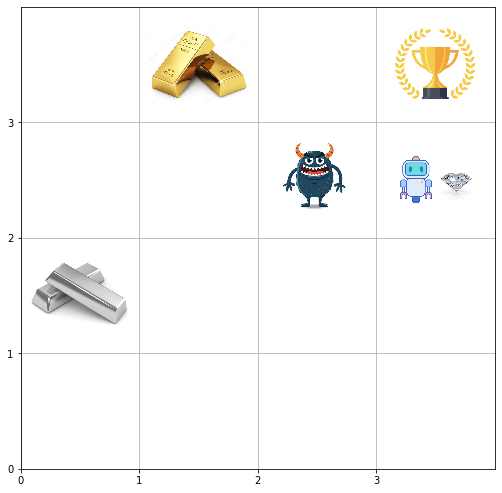

Episode Number :  9
Timestep :  6
Agent Position : [3 3]
Action : 2
Reward : 100


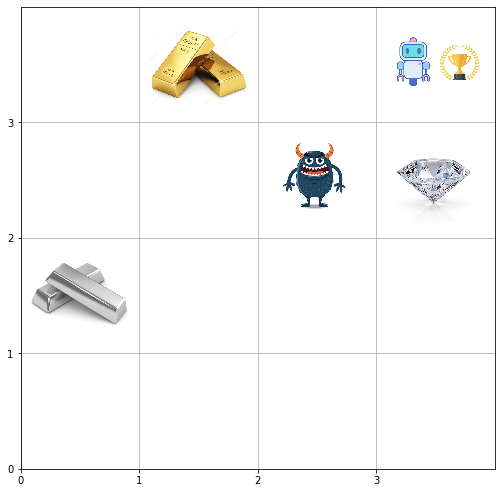

Average timesteps per episode: 6.0
Average penalties per episode: 0.0


Text(0, 0.5, 'Penality')

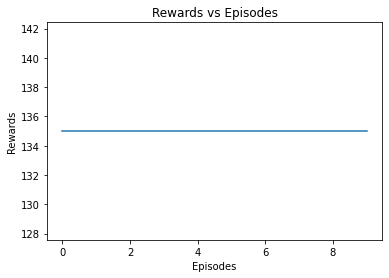

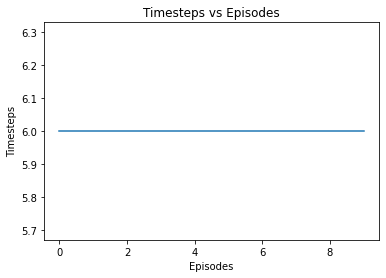

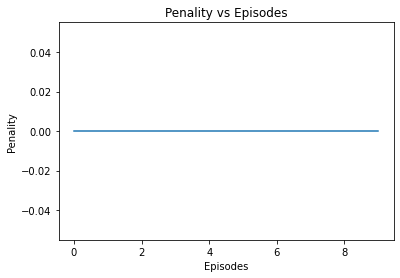

In [199]:
                                                ##### EVALUATION #####

total_episode = 10
total_timesteps, total_penalties = 0, 0
reward_history_ql = []
timestep_history_ql = []
penality_history_ql = []


for i in range(total_episode):
    state = env.reset()
    time_step_per_episode = 0
    total_rewards_per_episode = 0
    total_penality_per_episode = 0 
    done = False    
    while not done:
        action = np.argmax(qlearning_table_ql[state])
        observation, state, reward, done, info, timestep, agent_pos, action = env.step(action)
        if reward == -1:
            total_penality_per_episode += 1
        total_rewards_per_episode+=reward    
        time_step_per_episode += 1
        if(i>total_episode-2):
          print('Episode Number : ',i)
          print('Timestep : ',timestep)
          print('Agent Position :',agent_pos)
          print('Action :',action)
          print('Reward :',reward)
          env.render()
          plt.show()
          time.sleep(1)

    timestep_history_ql.append(time_step_per_episode) #Timesteps for each Episode
    reward_history_ql.append(total_rewards_per_episode) #Rewards for each Episode
    penality_history_ql.append(total_penality_per_episode) #Penality for each episode

    total_timesteps += time_step_per_episode
    total_penalties += total_penality_per_episode

average_timesteps=total_timesteps/total_episode
average_penalities=total_penalties/total_episode
print("Average timesteps per episode:", average_timesteps )
print("Average penalties per episode:", average_penalities)


plt.plot(reward_history_ql)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(timestep_history_ql)  
plt.title('Timesteps vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Timesteps') 
plt.figure()
plt.plot(penality_history_ql)  
plt.title('Penality vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Penality') 

### **Part 2 - SARSA Algorithm**

Episode Number :  999
Timestep :  1
Agent Position : [0 1]
Action : 2
Reward : 5


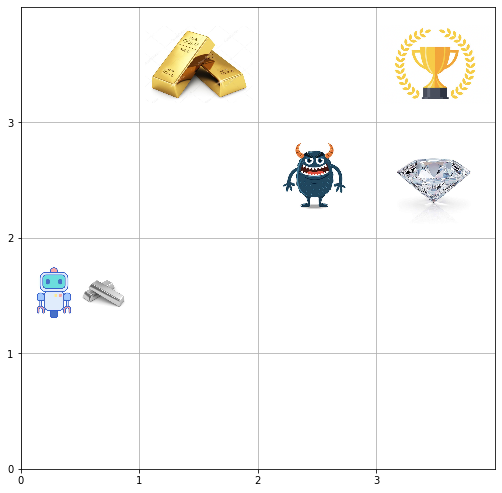

Episode Number :  999
Timestep :  2
Agent Position : [1 1]
Action : 0
Reward : 0


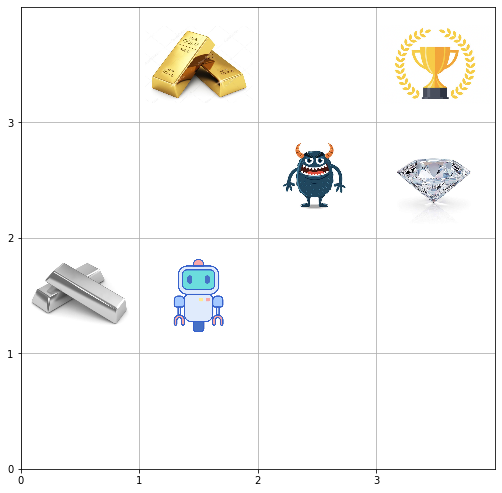

Episode Number :  999
Timestep :  3
Agent Position : [2 1]
Action : 0
Reward : 0


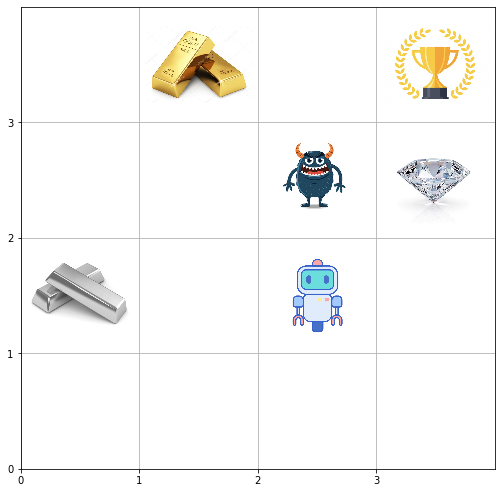

Episode Number :  999
Timestep :  4
Agent Position : [3 1]
Action : 0
Reward : 0


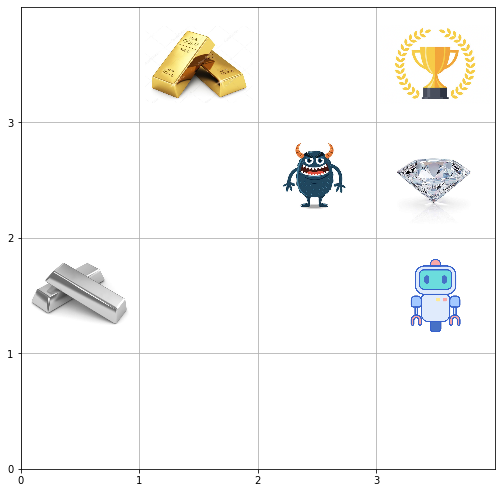

Episode Number :  999
Timestep :  5
Agent Position : [3 2]
Action : 2
Reward : 30


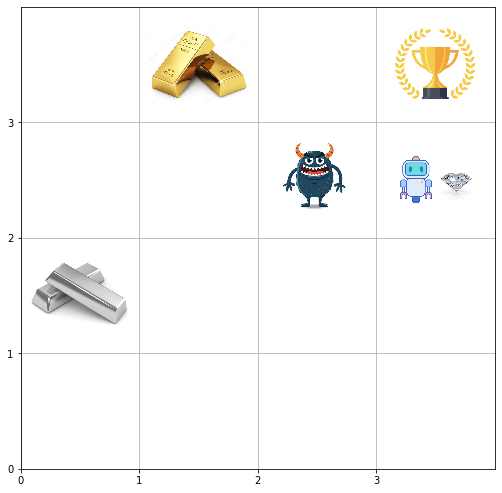

Episode Number :  999
Timestep :  6
Agent Position : [3 3]
Action : 2
Reward : 100


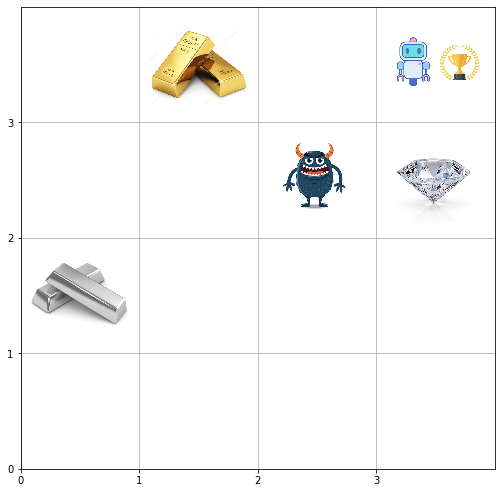

Text(0, 0.5, 'Epsilon')

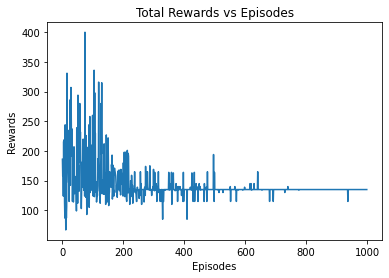

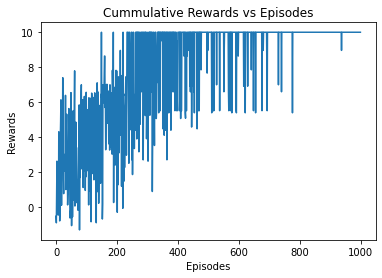

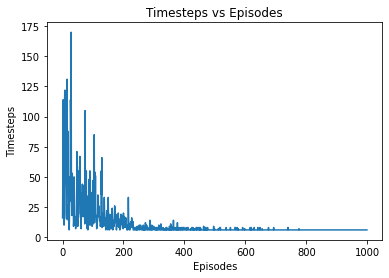

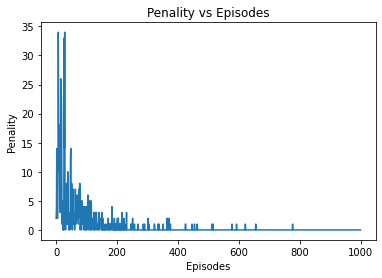

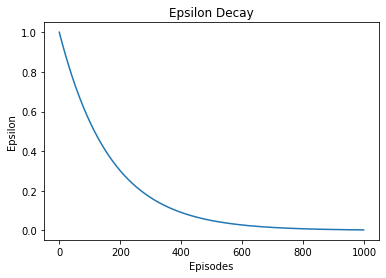

In [211]:
                                        ##### TRAINING #####

env = Deterministic_GridEnvironment()

#Initializing a Q learning table with a dimension of observation space and action space 
sarsa_q_table= np.zeros([env.observation_space.n, env.action_space.n])

#Inilializing all the hyper parameters required for the model
total_episode = 1000
alpha = 0.1
gamma = 0.6

#Initialize epsilon(for implementing greedy algorithm)
epsilon = 0.9

cummulative_reward_history_sarsa = []
total_reward_history_sarsa = []
total_timestep_history_sarsa = []
total_penality_history_sarsa = []
total_epsilon_decay_sarsa = []

#Action function to choose action for every step in an episode
def choose_action(state):
  action = 0
  if np.random.uniform(0,1) < epsilon:
    action = np.random.choice(env.action_space.n)
  else:
    action = np.argmax(sarsa_q_table[state, :])
  return action

for i in range(total_episode):
  time_step_per_episode = 0
  cummulative_rewards_per_episode = 0
  total_rewards_per_episode = 0
  total_penality_per_episode = 0

  state_1 = env.reset()
  action_1 = choose_action(state_1)
  done = False
  #Looping through each step an agent takes in an environment until it reaches a terminal state
  while not done:
      observation, state_2, reward, done, info, timestep, agent_pos, action = env.step(action_1)
      action_2 = choose_action(state_2)
      sarsa_q_table[state_1,action_1] = sarsa_q_table[state_1,action_1] + alpha * (reward + gamma * sarsa_q_table[state_2, action_2] - sarsa_q_table[state_1,action_1])
      state_1 = state_2
      action_1 = action_2
      time_step_per_episode+=1
      cummulative_rewards_per_episode+=reward * (gamma ** time_step_per_episode)
      total_rewards_per_episode+=reward
      if reward == -1:
        total_penality_per_episode+=1
      if(i>total_episode-2):
        print('Episode Number : ',i)
        print('Timestep : ',timestep)
        print('Agent Position :',agent_pos)
        print('Action :',action)
        print('Reward :',reward)      
        env.render()
        plt.show()
        time.sleep(1)
  cummulative_reward_history_sarsa.append(cummulative_rewards_per_episode)
  total_reward_history_sarsa.append(total_rewards_per_episode)
  total_timestep_history_sarsa.append(time_step_per_episode)
  total_penality_history_sarsa.append(total_penality_per_episode)

  #Having a epsilon decay of -6 factor would make the decay much faster there staying in the exploitation phase equally
  epsilon= np.exp(-6*i/total_episode)
  total_epsilon_decay_sarsa.append(epsilon)

plt.plot(total_reward_history_sarsa)
plt.title('Total Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(cummulative_reward_history_sarsa)
plt.title('Cummulative Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.figure()
plt.plot(total_timestep_history_sarsa)  
plt.title('Timesteps vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Timesteps') 
plt.figure()
plt.plot(total_penality_history_sarsa)  
plt.title('Penality vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Penality') 
plt.figure()
plt.plot(total_epsilon_decay_sarsa)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')


In [212]:
sarsa_q_table_df = pd.DataFrame(sarsa_q_table,columns=['Right','Left','Up','Down'])
sarsa_q_table_df

,Right,Left,Up,Down
0,5.587759,6.465763,16.663054,4.604247
1,19.440000,11.034142,8.825067,5.096066
2,18.480052,3.317626,8.108673,9.481776
3,31.333170,4.882736,6.346469,2.623190
4,2.321103,4.254766,15.092726,0.856623
5,32.400000,12.396343,14.094117,4.751101
6,5.877378,3.879382,39.627235,6.866634
7,57.774574,10.266229,26.789744,8.102164
8,17.717692,0.829380,3.321731,0.035390
9,54.000000,12.562630,18.961980,5.671527


Episode Number :  9
Timestep :  1
Agent Position : [0 1]
Action : 2
Reward : 5


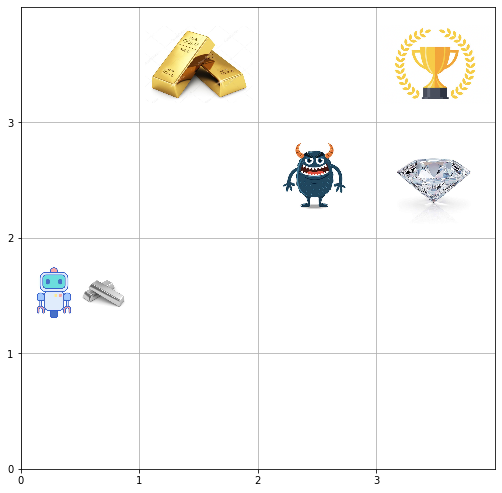

Episode Number :  9
Timestep :  2
Agent Position : [1 1]
Action : 0
Reward : 0


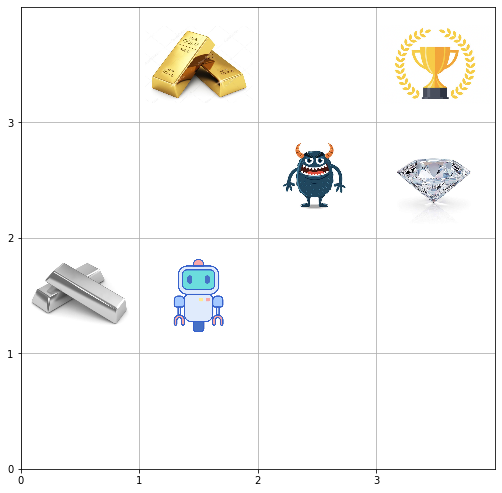

Episode Number :  9
Timestep :  3
Agent Position : [2 1]
Action : 0
Reward : 0


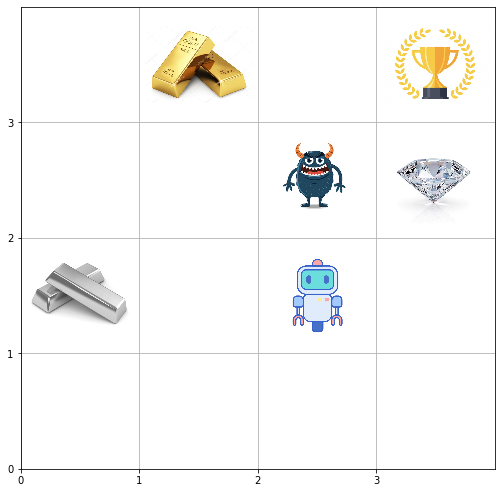

Episode Number :  9
Timestep :  4
Agent Position : [3 1]
Action : 0
Reward : 0


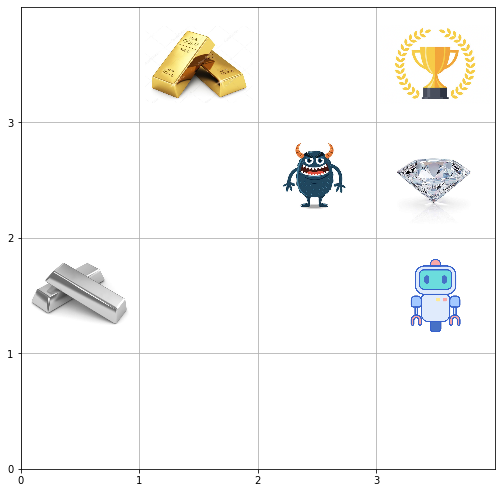

Episode Number :  9
Timestep :  5
Agent Position : [3 2]
Action : 2
Reward : 30


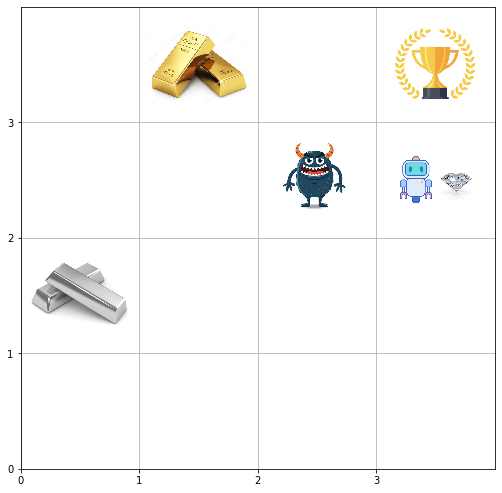

Episode Number :  9
Timestep :  6
Agent Position : [3 3]
Action : 2
Reward : 100


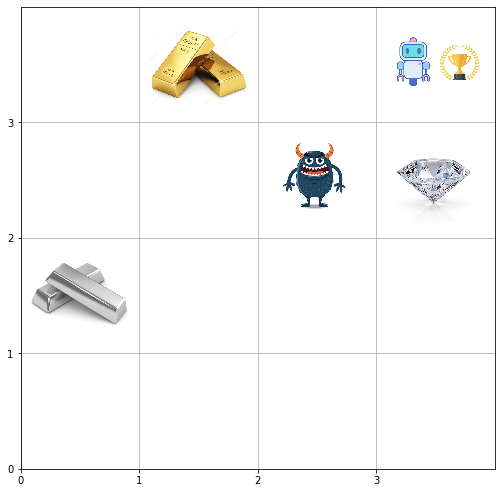

Average timesteps per episode: 6.0
Average penalties per episode: 0.0


Text(0, 0.5, 'Penality')

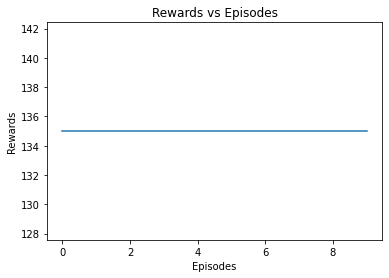

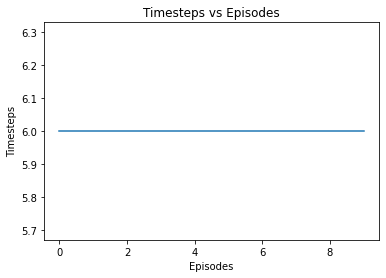

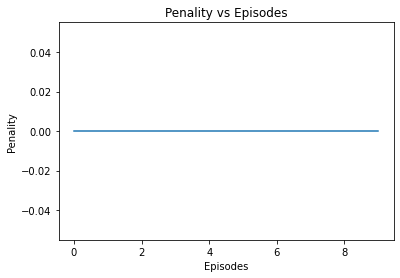

In [213]:
                                            ##### EVALUATION #####

total_episode = 10
total_timesteps, total_penalties = 0, 0
reward_history_sarsa = []
timestep_history_sarsa = []
penality_history_sarsa = []


for i in range(total_episode):
    state = env.reset()
    time_step_per_episode = 0
    total_rewards_per_episode = 0
    total_penality_per_episode = 0 
    done = False    
    while not done:
        action = np.argmax(sarsa_q_table[state])
        observation, state, reward, done, info, timestep, agent_pos, action = env.step(action)
        if reward == -1:
            total_penality_per_episode += 1
        total_rewards_per_episode+=reward    
        time_step_per_episode += 1
        if(i>total_episode-2):
          print('Episode Number : ',i)
          print('Timestep : ',timestep)
          print('Agent Position :',agent_pos)
          print('Action :',action)
          print('Reward :',reward)
          env.render()
          plt.show()
          time.sleep(1)

    timestep_history_sarsa.append(time_step_per_episode) #Timesteps for each Episode
    reward_history_sarsa.append(total_rewards_per_episode) #Rewards for each Episode
    penality_history_sarsa.append(total_penality_per_episode) #Penality for each episode

    total_timesteps += time_step_per_episode
    total_penalties += total_penality_per_episode

average_timesteps=total_timesteps/total_episode
average_penalities=total_penalties/total_episode
print("Average timesteps per episode:", average_timesteps )
print("Average penalties per episode:", average_penalities)


plt.plot(reward_history_sarsa)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(timestep_history_sarsa)  
plt.title('Timesteps vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Timesteps') 
plt.figure()
plt.plot(penality_history_sarsa)  
plt.title('Penality vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Penality') 

### **Q_Learning vs SARSA**

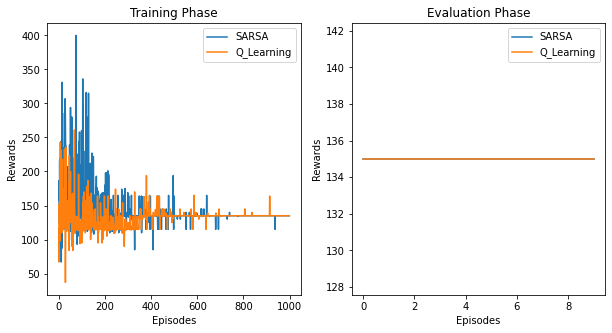

In [214]:
#Reward Comparision

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)

ax1.set_title("Training Phase")
ax1.plot(total_reward_history_sarsa,label = "SARSA")
ax1.plot(total_reward_history_ql,label = 'Q_Learning')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Rewards")
ax1.legend()

ax2.set_title("Evaluation Phase")
ax2.plot(reward_history_sarsa,label = "SARSA")
ax2.plot(reward_history_ql,label = 'Q_Learning')
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Rewards")
ax2.legend()

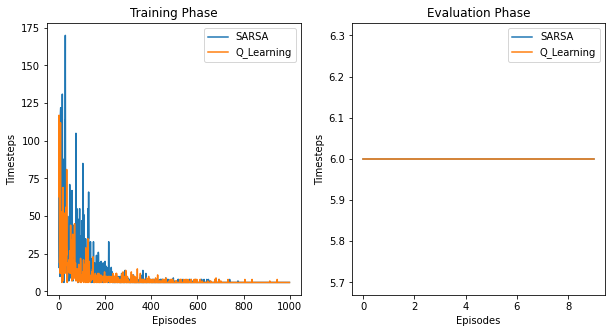

In [215]:
#Timestep Comparision

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)

ax1.set_title("Training Phase")
ax1.plot(total_timestep_history_sarsa,label = "SARSA")
ax1.plot(total_timestep_history_ql,label = 'Q_Learning')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Timesteps")
ax1.legend()

ax2.set_title("Evaluation Phase")
ax2.plot(timestep_history_sarsa,label = "SARSA")
ax2.plot(timestep_history_ql,label = 'Q_Learning')
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Timesteps")
ax2.legend()

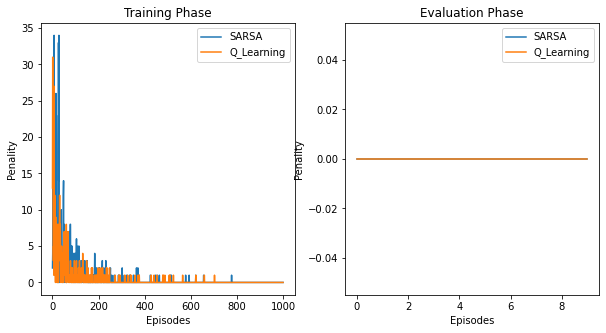

In [216]:
#Penality Comparision

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(10)

ax1.set_title("Training Phase")
ax1.plot(total_penality_history_sarsa,label = "SARSA")
ax1.plot(total_penality_history_ql,label = 'Q_Learning')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Penality")
ax1.legend()

ax2.set_title("Evaluation Phase")
ax2.plot(penality_history_sarsa,label = "SARSA")
ax2.plot(penality_history_ql,label = 'Q_Learning')
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Penality")
ax2.legend()